<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/MNA_IAyAA_matriz_de_confusion_active_class_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Inteligencia Artificial y Aprendizaje Automático
###Maestría en Inteligencia Artificial Aplicada

####Ejercicio en la active class de la semana 3.

Ejercicio basado en los datos llamados "Pima Indians Diabetes".


https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 

Algunos artículos que usaron esta base de datos en su investigación:

https://archive.ics.uci.edu/ml/support/diabetes 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression

In [ ]:
mypath = "pima_indians_diabetes.csv"

data = pd.read_csv(mypath, sep=",", header='infer')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data[['Outcome']]

In [ ]:
Counter(Y['Outcome'])

Counter({1: 268, 0: 500})

In [ ]:
268 / 768

0.3489583333333333

In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, train_size=0.8, random_state=1)

print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

print(ytrain.shape)
print(yval.shape)
print(ytest.shape)

(614, 8)
(154, 8)
(154, 8)
(614, 1)
(154, 1)
(154, 1)


In [ ]:
modelo_LR = LogisticRegression(max_iter=1000, 
                               penalty='l2',
                               C=0.1,
                               solver='lbfgs',
                               random_state=10)

modelo_LR.fit(Xtrain, np.ravel(ytrain))

print('Entrenamiento-exactitud: %.4f' % modelo_LR.score(Xtrain, ytrain))

print('Validación-exactitud: %.4f' % modelo_LR.score(Xval, yval))

Entrenamiento-exactitud: 0.7736
Validación-exactitud: 0.7727


In [ ]:
# predicciones con decimales-probabilístico:
print(modelo_LR.predict_proba(Xval[10:14]))

# predicciones binarias:
print(modelo_LR.predict(Xval[10:14]))

[[0.53804979 0.46195021]
 [0.93609679 0.06390321]
 [0.02653975 0.97346025]
 [0.2531475  0.7468525 ]]
[0 0 1 1]


In [ ]:
pred_bin = modelo_LR.predict(Xval)

# ytest : etiquetas reales
# pred_bin : predicciones del modelo

cm = confusion_matrix(yval, pred_bin)    # los renglones son los reales y las columnas las predicciones,
                                          # por la manera en que están acomodados como argumentos.
print(cm)

[[89 10]
 [25 30]]


In [ ]:
pred = modelo_LR.predict_proba(Xtest)    # predicciones en formato probabilístico.
pred[0:5,:]  # la suma de los valores por renglón es 1. P.ej., un valor arriba de 0.5 es de la clase de esa coordenada
             # por lo que con solo una columna podemos seguir trabajando ya que son complementarias. 
             # En particular seleccionaremos más adelante la segunda columna y trabajaremos con ella:

array([[0.06547928, 0.93452072],
       [0.84994409, 0.15005591],
       [0.90548323, 0.09451677],
       [0.37836749, 0.62163251],
       [0.89870386, 0.10129614]])

In [ ]:
my0s = (yval['Outcome']==0)   # Se genera el vector Booleano, my0s, con TRUE para las entradas con 0s y FALSE para los 1s. Buscamos quedarnos solo con los negativos.
my1s = (yval['Outcome']==1)   # De manera complementaria, ahora "my1s" es el vector Booleanco con TRUE para los 1s - FALSE para los 0s. Ahora buscamos solo los positivos.

print(my0s.shape)
print(sum(my0s))   # ambos suman el total de Validation set.
print(sum(my1s))

(154,)
99
55


###**Observa que para el caso de la clase 0, aún cuando el vector de predicciones pred0s tiene las probabilidades cercanas al 1 en la primer coordenada (o coordenada 0), nosotros seleccionamos la segunda coordenada (o coordenada 1) porque es el complemento que tiene los valores cercanos al 0. Y estos valores cercanos al 0 son los que se estarán graficando en el scatter plot. Para el caso de la clase 1 la misma segunda coordenada nos da directamente su probabilidad.**

In [ ]:
pred[0:5,:]  # todas las predicciones...

array([[0.06547928, 0.93452072],
       [0.84994409, 0.15005591],
       [0.90548323, 0.09451677],
       [0.37836749, 0.62163251],
       [0.89870386, 0.10129614]])

In [ ]:
pred[my0s]    # solo las predicciones donde la primer coordenada es la que tiene etiqueta real 0.
              # Es decir, si el modelo hubiera quedado entrenado al 100% de accuracy, todas las 
              # primeras coordenadas debieran tener un valor de probabilidad mayor a la segunda coordenada.
              # Y así, las primeras coordenadas que veas menores a 0.5, serían errores de predicción,
              # estrictamente son FP. 

array([[0.06547928, 0.93452072],
       [0.84994409, 0.15005591],
       [0.90548323, 0.09451677],
       [0.37836749, 0.62163251],
       [0.89870386, 0.10129614],
       [0.96619293, 0.03380707],
       [0.27017224, 0.72982776],
       [0.219845  , 0.780155  ],
       [0.72538886, 0.27461114],
       [0.66938769, 0.33061231],
       [0.4658509 , 0.5341491 ],
       [0.05225204, 0.94774796],
       [0.90422998, 0.09577002],
       [0.97427164, 0.02572836],
       [0.66378048, 0.33621952],
       [0.76573038, 0.23426962],
       [0.95271191, 0.04728809],
       [0.67915887, 0.32084113],
       [0.96159434, 0.03840566],
       [0.89252246, 0.10747754],
       [0.80243848, 0.19756152],
       [0.92804121, 0.07195879],
       [0.89101072, 0.10898928],
       [0.50611722, 0.49388278],
       [0.91388838, 0.08611162],
       [0.69402657, 0.30597343],
       [0.22194616, 0.77805384],
       [0.75907213, 0.24092787],
       [0.79334274, 0.20665726],
       [0.84713073, 0.15286927],
       [0.

In [ ]:
pred.shape    #  tamaño (154,2) con las probabilidades compelemtarias por renglón.

(154, 2)

In [ ]:
# Así, al seleccionar solo la segunda columna, queda automáticamente que cuando dicho valor es menor a 0.5, la podemos
# asociar ahora a la clase negativa y cuando sea mayor al 0.5 será de la clase positiva

pred0s  = pred[my0s][:,1]    # seleccionamos las probabilidades de nuestro modelo solo para los casos de etiquetas de 0s reales.
                             # Es decir, en teoría todos estos debieran ser probabilidades de predicción menores a 0.5.

pred1s  = pred[my1s][:,1]    # seleccionamos las probabilidades de nuestro modelo solo para los casos de etiquetas de 1s reales.
                             # Es decir, en teoría todos estos debieran ser predicciones de valores mayores a 0.5.

print(pred0s.shape)   
print(pred1s.shape)

(99,)
(55,)


###**Generemos una gráfica para visualizar mejor esta relación:**

In [ ]:
r0 = np.random.uniform(-0.3,0.3, size=pred0s.shape[0])    # Generamos aleatorios uniforme para el eje x
                                                          # de longitud el total de 0-TRUEs en Xtest, entre
                                                          # algún intervalo deseado, que aquí usamos (-0.3, +0.3)

r1 = np.random.uniform(0.7,1.3, size=pred1s.shape[0])     # El análogo para 1-TRUEs de Xtest. Pero para que aparezcan
                                                          # cercanos uno al otro, seleccionemos ahora el intervalo (+0.7, +1.3)

print(r0.shape)
#print(r0[0:5])
print(r1.shape)
#print(r1[0:5])

(99,)
(55,)


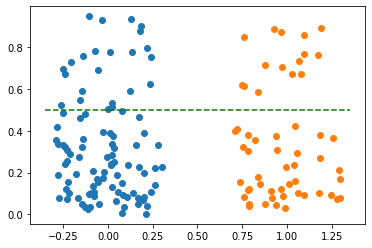

In [ ]:
# En el gráfico los puntos azules son las predicciones de todos los registros negativos reales.
# Es decir, para un modelo perfecto, todos los puntos azules deberían haber quedado abajo de 0.5.

# La columna de los puntos anaranjados son todas las predicciones de los registros positivos reales.
# Es decir, en teoría todos estos puntos debieron haber quedado arriba del 0.5.

plt.scatter(x=r0, y=pred0s)   # En teoría todos estos debieran ser menores a 0.5.
plt.scatter(x=r1, y=pred1s)   # Y todos estos debieran ser mayores a 0.5.

plt.hlines(0.5, -0.35, 1.35, color='g', linestyles='dashed')   # el primer valor es la constante para "y" y los otros 2 son 
                                                               # donde inicia y termina en el eje horizontal.
plt.show()

In [ ]:
# Cuando hacemos nuestras predicciones y obtenemos por ejemplo la matriz de confusión,
# de manera predeterminada se está considerando que 0.5 es el umbral para las clases negativa y positiva.

pred_bin = modelo_LR.predict(Xval)
cm = confusion_matrix(yval, pred_bin)    # los renglones son los reales y las columnas las predicciones.
print(cm)

tt = np.sum(cm)
print('real-0: [%.3f, %.3f]' % (cm[0,0]/tt, cm[0,1]/tt))
print('real-1: [%.3f, %.3f]' % (cm[1,0]/tt, cm[1,1]/tt))

[[89 10]
 [25 30]]
real-0: [0.578, 0.065]
real-1: [0.162, 0.195]


In [ ]:
TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])
print('TP_rate-recall:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

TP_rate-recall:0.54545
FP_rate:0.10101


###**Ajustando para un mejor umbral (threshold)**

In [ ]:
# regresa los TP para un umbral deseado:

def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y['Outcome']==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

In [ ]:
fun_thTPrate(0.5, modelo_LR, Xval, yval)  # validando nuestra función con th=0.5

0.5454545454545454

In [ ]:
# Análogo ahora con los FP:

def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y['Outcome']==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

In [ ]:
fun_thFPrate(0.5, modelo_LR, Xval, yval)   # validando nuestra función con th=0.5

0.10101010101010101

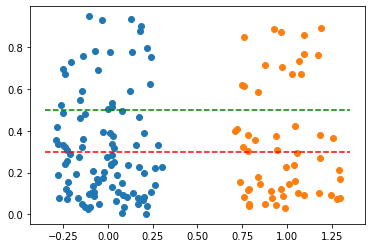

In [ ]:
new_th = 0.3 # búsqueda del mejor umbral

plt.scatter(x=r0, y=pred0s)
plt.scatter(x=r1, y=pred1s)

plt.hlines(0.5, -0.35,1.35,color='g',linestyles='dashed')
plt.hlines(new_th, -0.35,1.35,color='r',linestyles='dashed')
plt.show()

In [ ]:
# Obtengamos también los FN con un umbral dado, solo para comparar con FP:

def fun_thFNrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my1s = (y['Outcome']==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s<th) / sum(my1s)

In [ ]:
fFP = fun_thFPrate(new_th, modelo_LR, Xval, yval)
fFN = fun_thFNrate(new_th, modelo_LR, Xval, yval)

print(fFP)
print(fFN)
print('FP+FN = %.2f' % (fFP+fFN))

0.24242424242424243
0.2
FP+FN = 0.44


In [ ]:
fFP = fun_thFPrate(0.5, modelo_LR, Xval, yval)
fFN = fun_thFNrate(0.5, modelo_LR, Xval, yval)

print(fFP)
print(fFN)
print('FP+FN = %.2f' % (fFP+fFN))

0.10101010101010101
0.45454545454545453
FP+FN = 0.56


In [ ]:
# Busquemos cuál podría ser el umbral que minimice el total de las razones FP y FN:

tt = [t for t in np.arange(0.1,0.9,.1)]

for i in tt:
  fFP = fun_thFPrate(i, modelo_LR, Xval, yval)
  fFN = fun_thFNrate(i, modelo_LR, Xval, yval)

  print('(th, FPr+FNr) = (%.1f, %.2f)' % (i, fFP+fFN))

(th, FPr+FNr) = (0.1, 0.77)
(th, FPr+FNr) = (0.2, 0.58)
(th, FPr+FNr) = (0.3, 0.44)
(th, FPr+FNr) = (0.4, 0.55)
(th, FPr+FNr) = (0.5, 0.56)
(th, FPr+FNr) = (0.6, 0.55)
(th, FPr+FNr) = (0.7, 0.65)
(th, FPr+FNr) = (0.8, 0.80)


###**Predicciones y Matriz de Confusión con el mejor Umbral (threshold) en el conjunto de Prueba:**

In [ ]:
pred_pr = modelo_LR.predict_proba(Xtest)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = modelo_LR.predict(Xtest)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(ytest, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(ytest, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[97 10]
 [19 28]]

Predicciones con un mejor umbral de 0.30:
[[77 30]
 [ 7 40]]


In [ ]:
modelo_LR.score(Xtest, ytest)

0.8116883116883117